# Task 3 

# CAR PRICE PREDICTION WITH MACHINE LEARNING

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Reading csv file

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df[['Car_Company','Car_model']] = df['CarName'].str.split(' ',1,expand=True)

In [8]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Company,Car_model
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo,145e (sw)
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo,144ea
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo,244dl
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo,246


In [9]:
df['Car_Company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: Car_Company, dtype: int64

In [10]:
df['Car_model'].value_counts()

corolla      6
corona       6
504          6
dl           4
civic        3
            ..
rx2 coupe    1
rx3          1
xk           1
xf           1
246          1
Name: Car_model, Length: 141, dtype: int64

In [11]:
df[['Car_Company','Car_model']]

,Car_Company,Car_model
0,alfa-romero,giulia
1,alfa-romero,stelvio
2,alfa-romero,Quadrifoglio
3,audi,100 ls
4,audi,100ls
...,...,...
200,volvo,145e (sw)
201,volvo,144ea
202,volvo,244dl
203,volvo,246


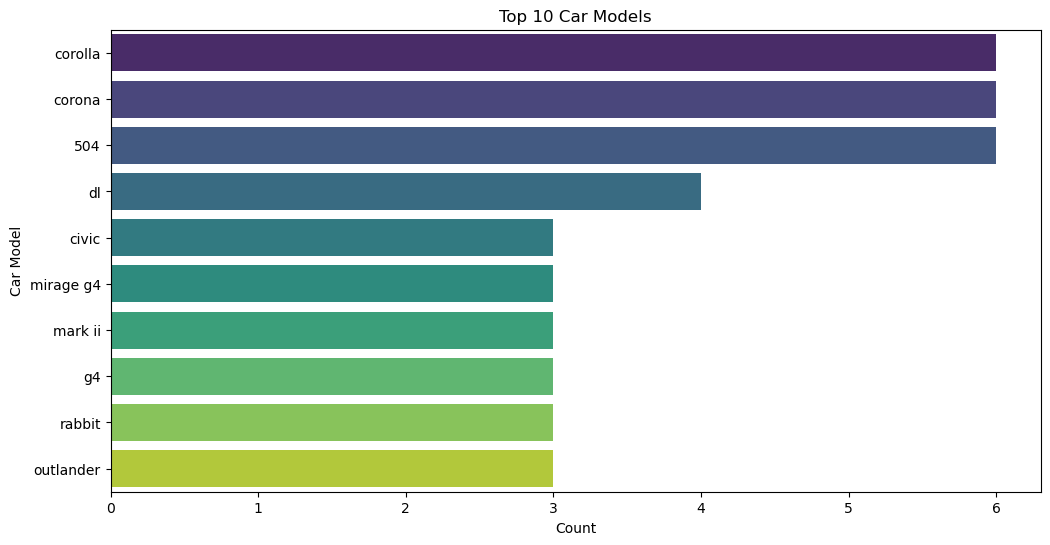

In [12]:
# Group the data by car model and count the occurrences
top_models = df['Car_model'].value_counts().head(10)

# Create a bar plot for the top 10 car models
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title('Top 10 Car Models')
plt.xlabel('Count')
plt.ylabel('Car Model')
plt.show()

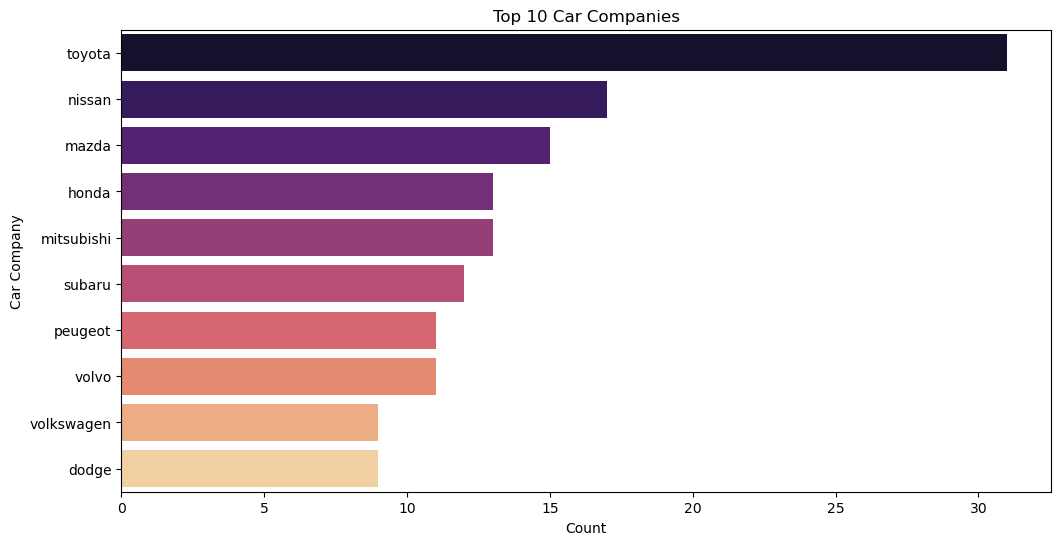

In [13]:
# Group the data by car company and count the occurrences
top_companies = df['Car_Company'].value_counts().head(10)

# Create a bar plot for the top 10 car companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')
plt.title('Top 10 Car Companies')
plt.xlabel('Count')
plt.ylabel('Car Company')
plt.show()


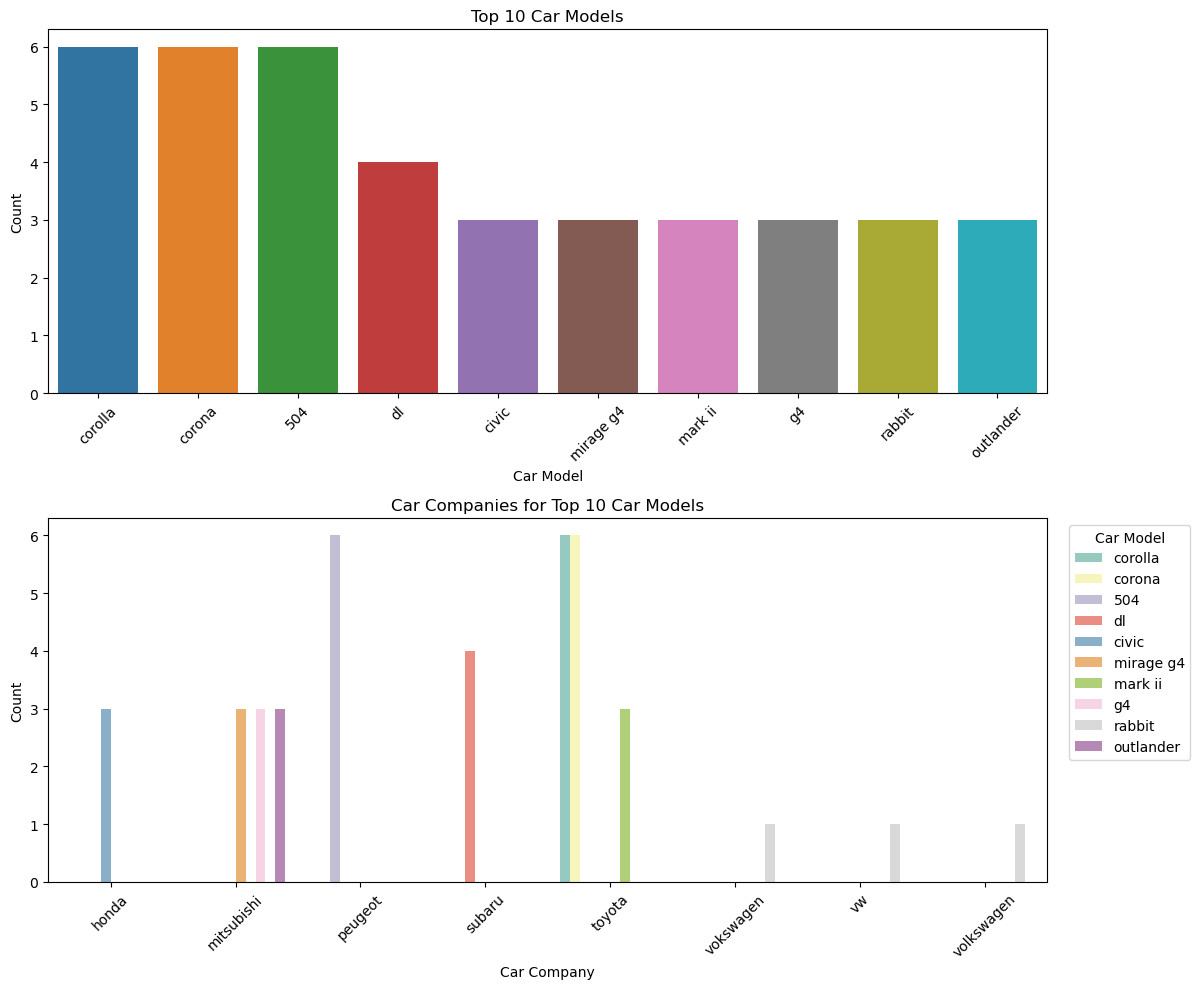

In [14]:
top_10_models = df['Car_model'].value_counts().head(10)
top_10_df = df[df['Car_model'].isin(top_10_models.index)]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

# Plot the top 10 car models
sns.countplot(data=top_10_df, x='Car_model', ax=axes[0], order=top_10_models.index)
axes[0].set_title('Top 10 Car Models')
axes[0].set_xlabel('Car Model')
axes[0].set_ylabel('Count')

# Plot the car companies corresponding to the top 10 car models
sns.countplot(data=top_10_df, x='Car_Company', ax=axes[1], hue='Car_model',
              hue_order=top_10_models.index, palette='Set3')
axes[1].set_title('Car Companies for Top 10 Car Models')
axes[1].set_xlabel('Car Company')
axes[1].set_ylabel('Count')
axes[1].legend(title='Car Model', loc='upper right', bbox_to_anchor=(1.15, 1))

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

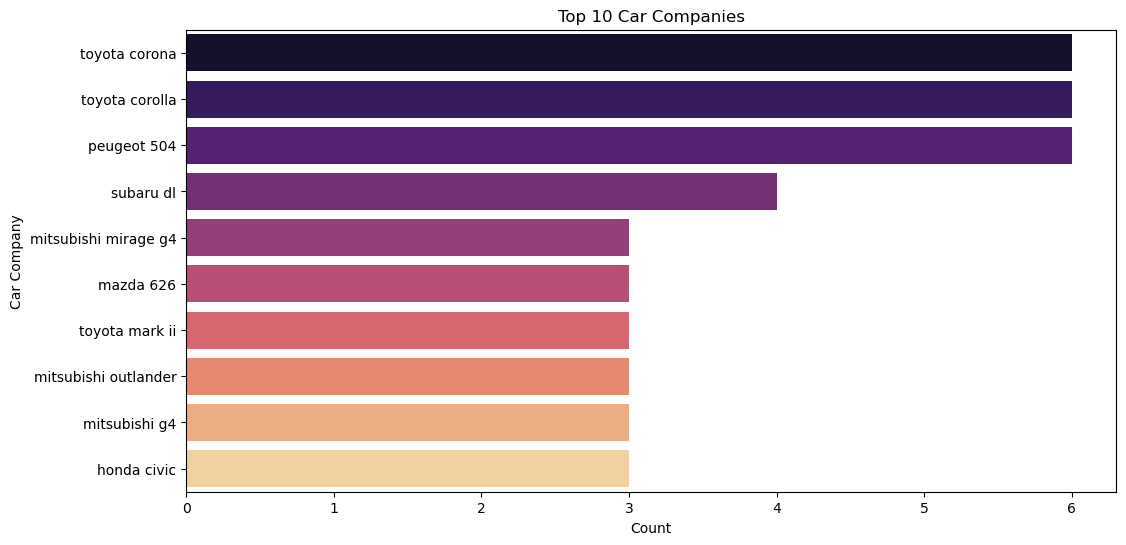

In [15]:
# Group the data by car company and count the occurrences
top_companies = df['CarName'].value_counts().head(10)

# Create a bar plot for the top 10 car companies
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='magma')
plt.title('Top 10 Car Companies')
plt.xlabel('Count')
plt.ylabel('Car Company')
plt.show()

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Car_Company', 'Car_model'],
      dtype='object')

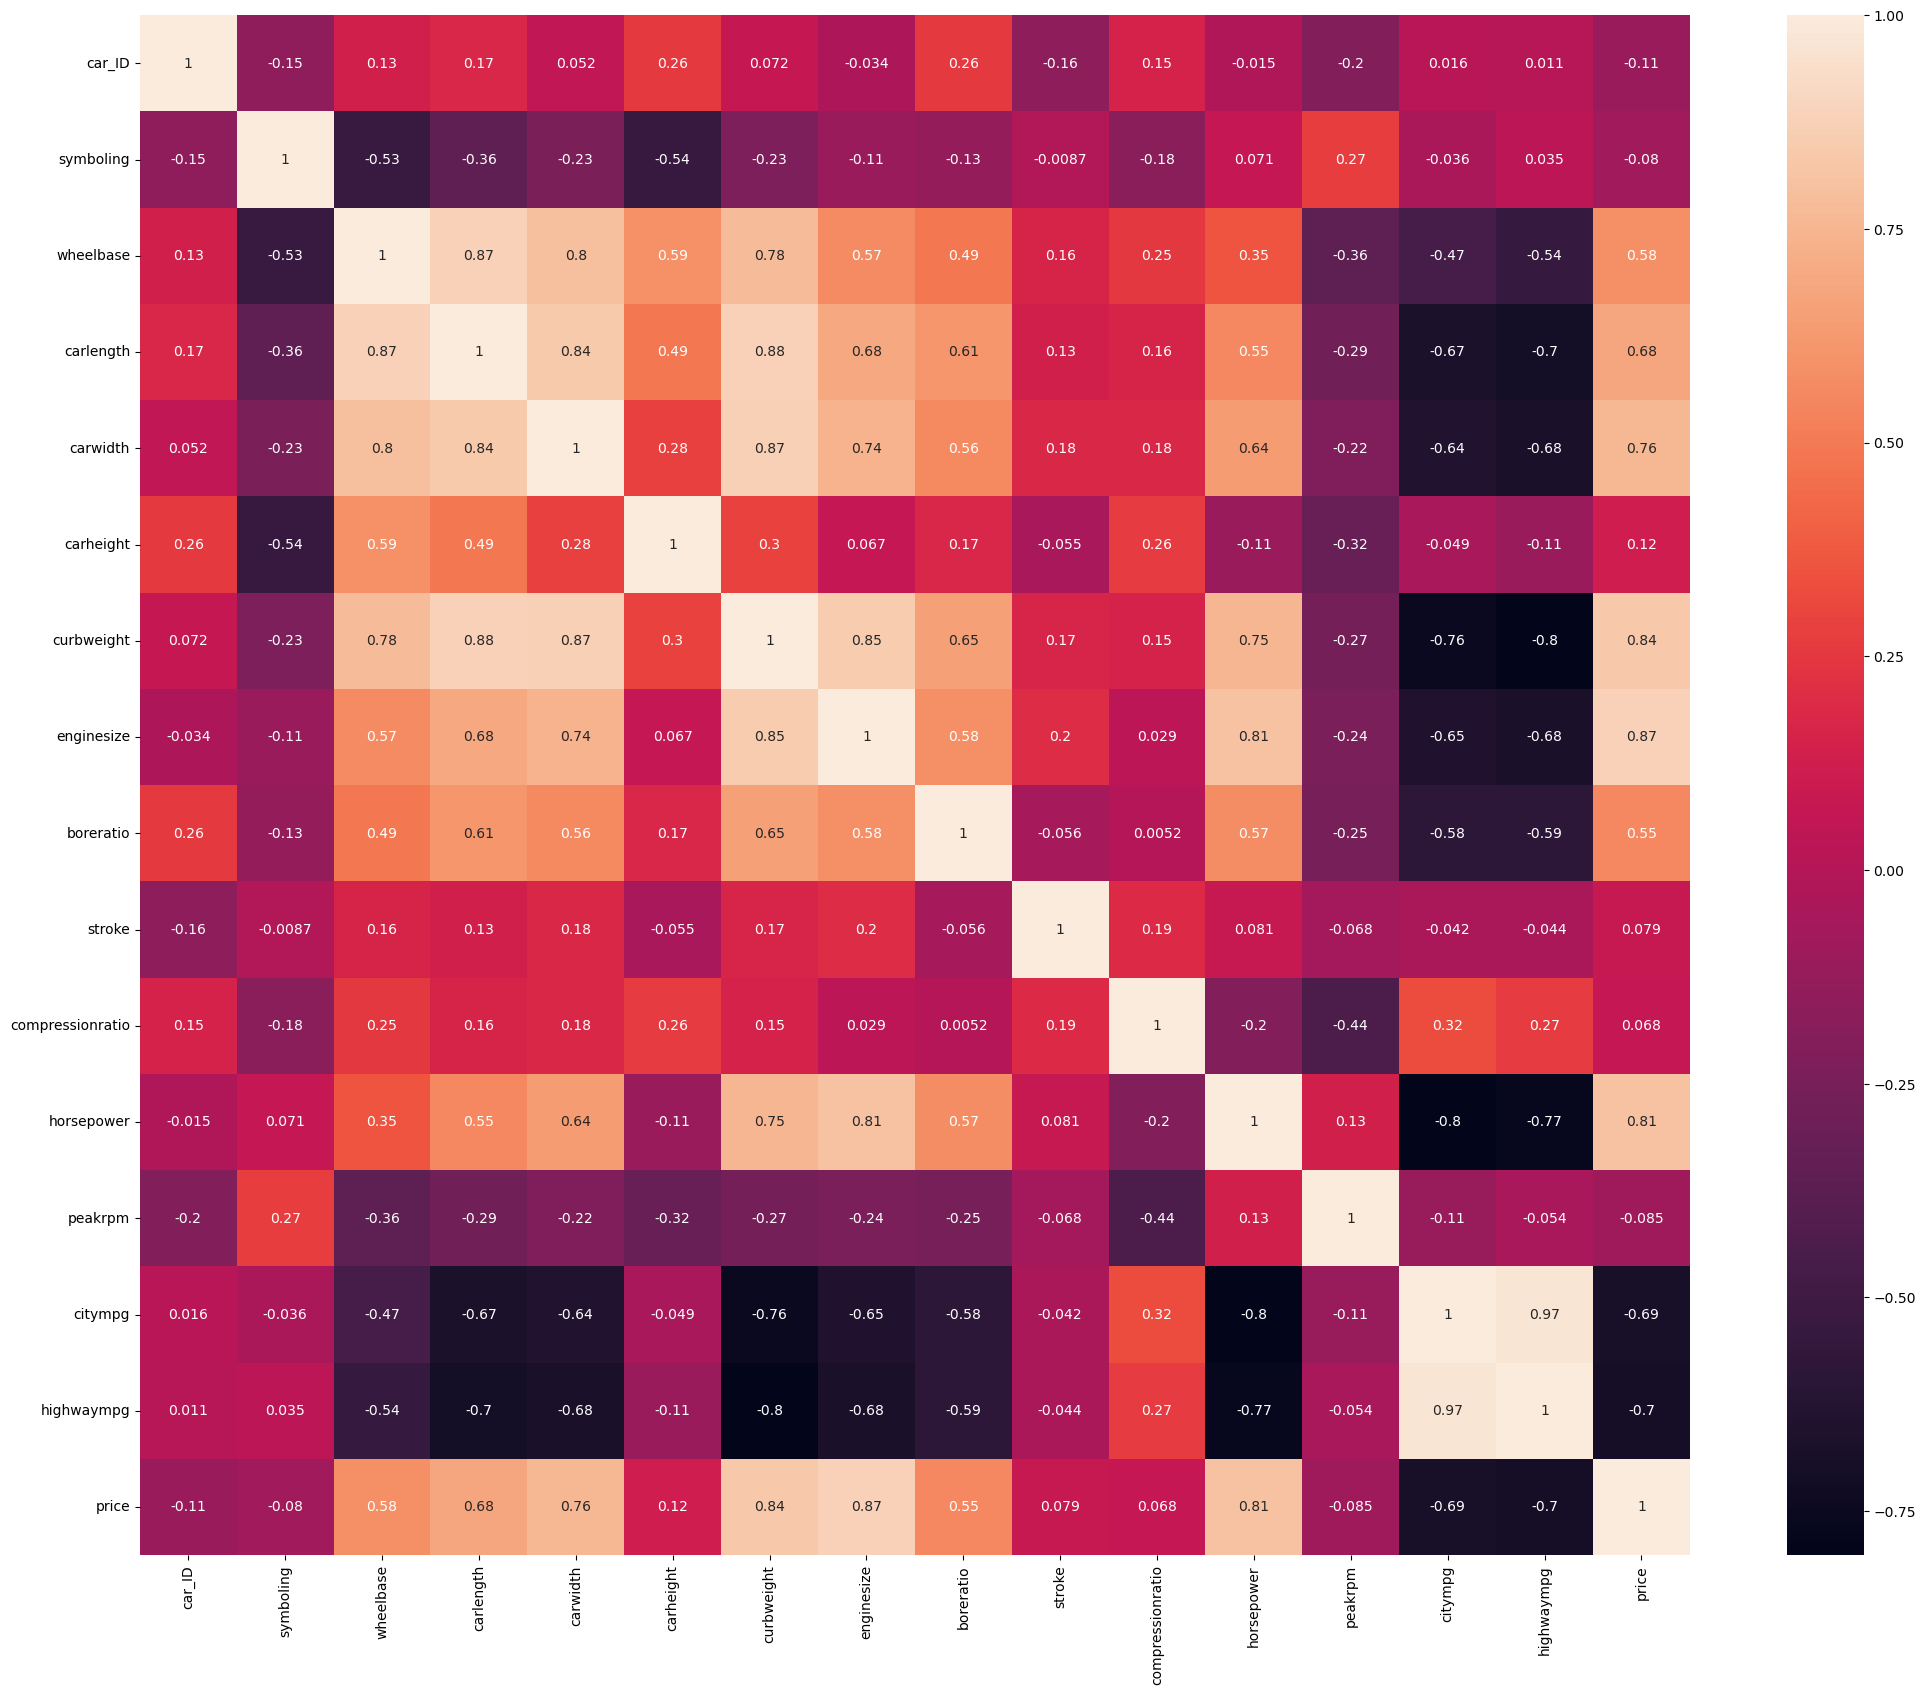

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

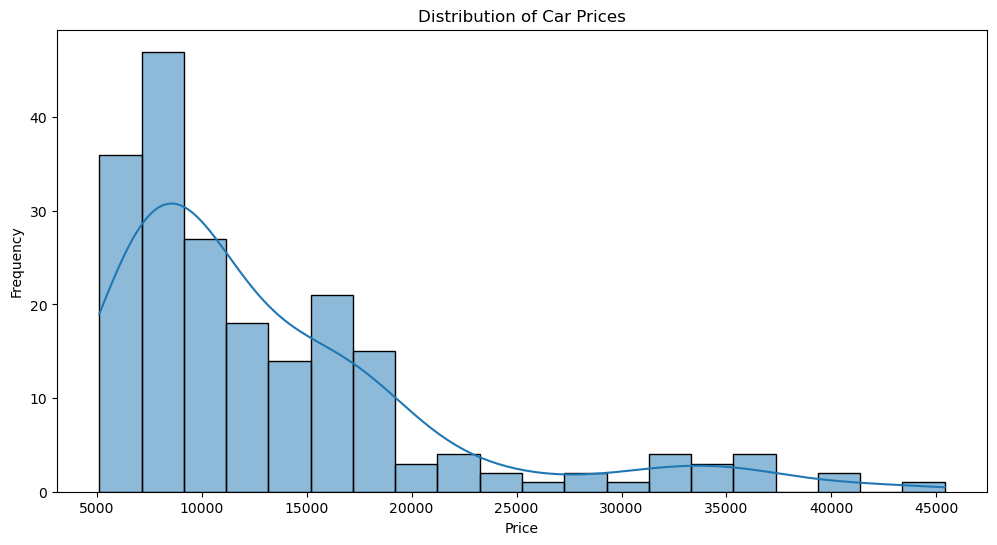

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='price', bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

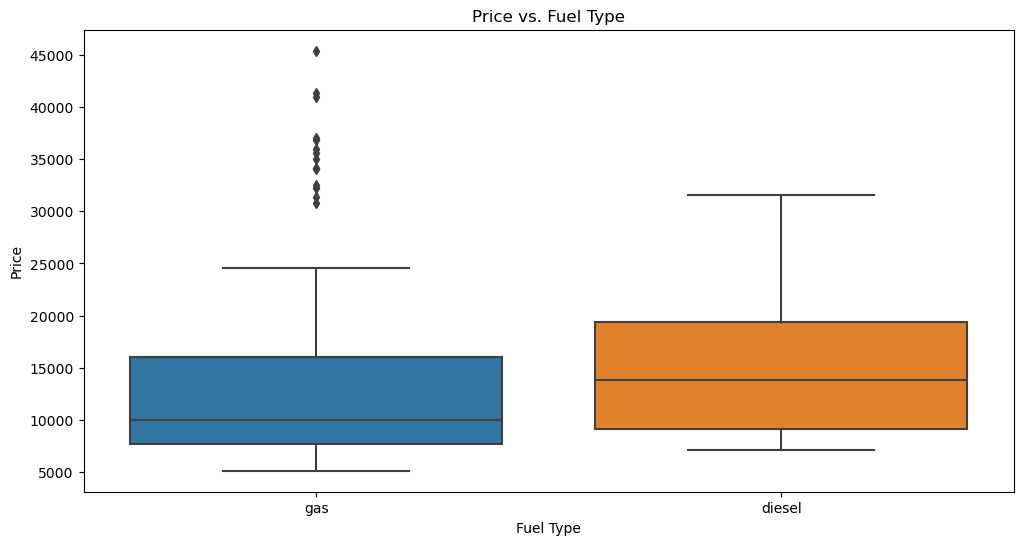

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fueltype', y='price')
plt.title('Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


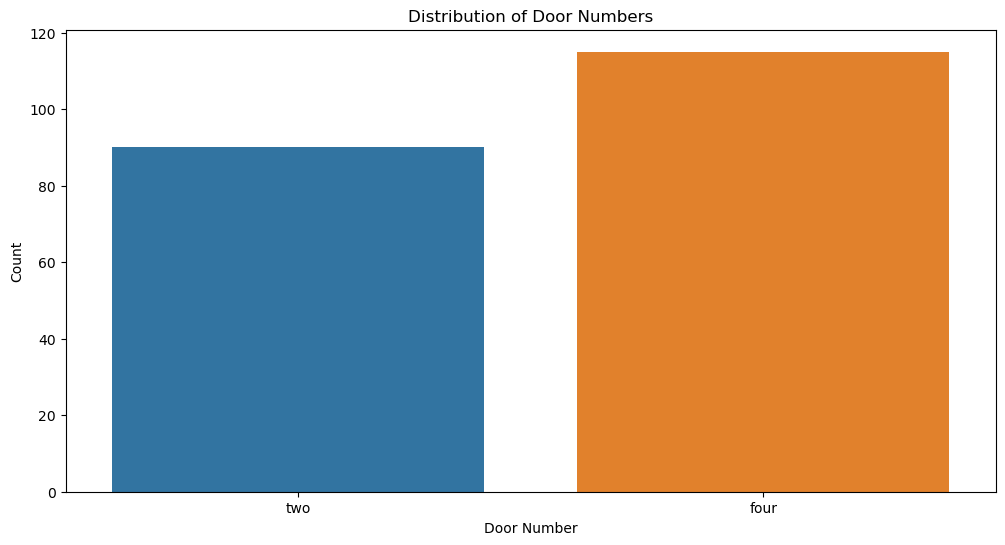

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='doornumber')
plt.title('Distribution of Door Numbers')
plt.xlabel('Door Number')
plt.ylabel('Count')
plt.show()


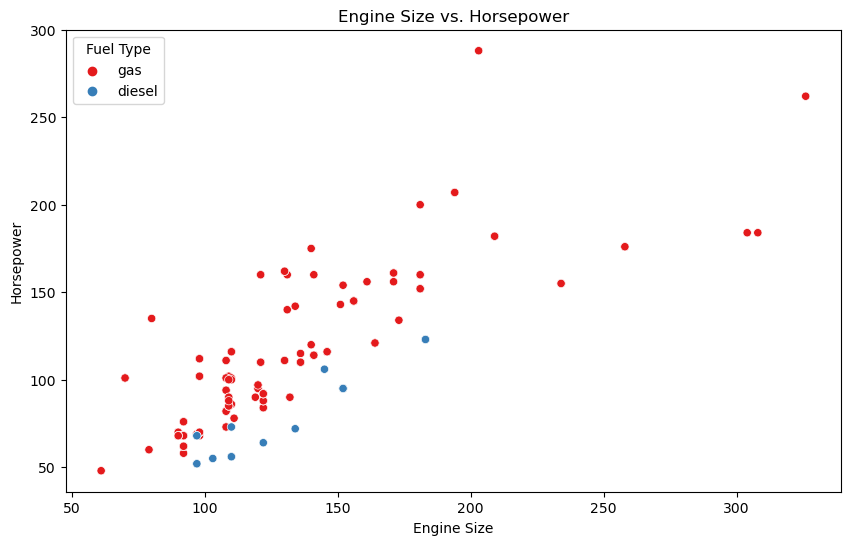

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='enginesize', y='horsepower', hue='fueltype', palette='Set1')
plt.title('Engine Size vs. Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.legend(title='Fuel Type')
plt.show()


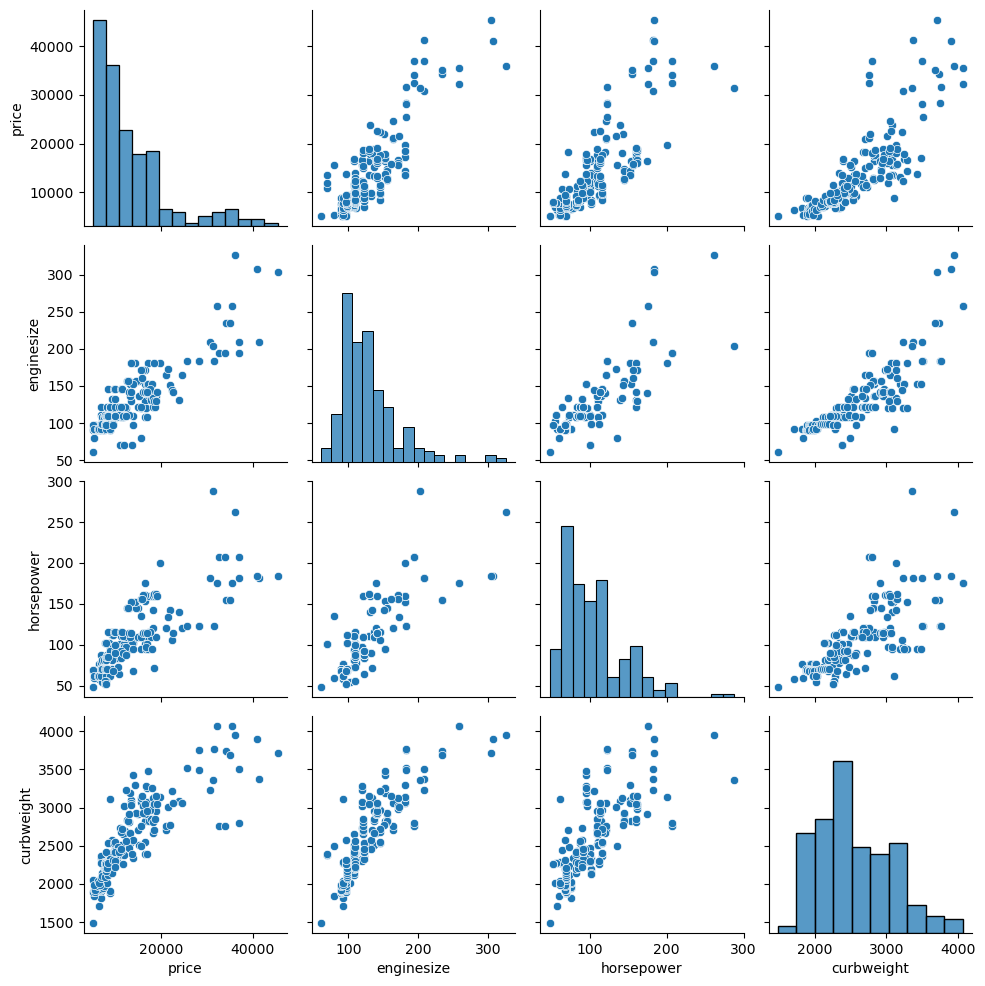

In [22]:
sns.pairplot(df[['price', 'enginesize', 'horsepower', 'curbweight']])

plt.show()

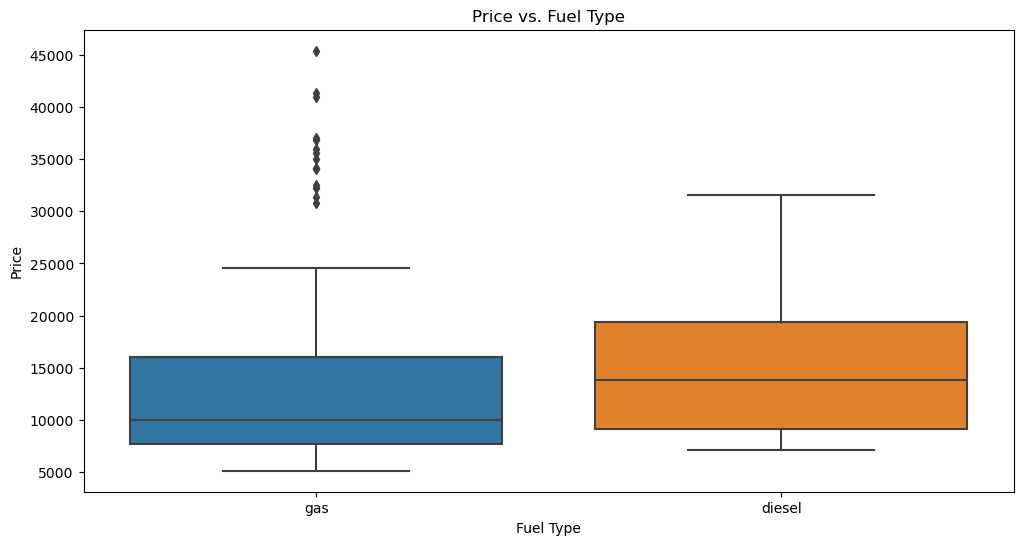

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fueltype', y='price')
plt.title('Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


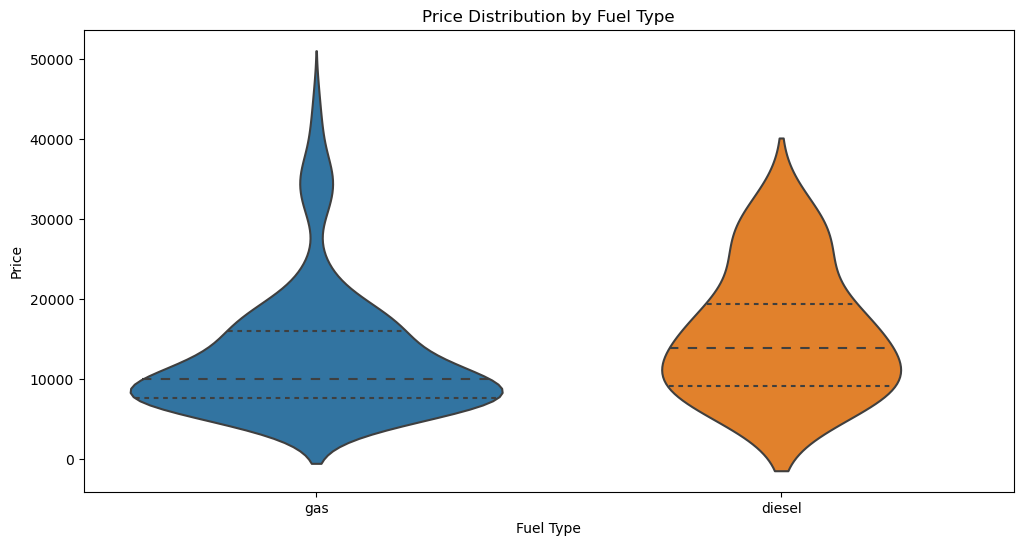

In [24]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='fueltype', y='price', inner='quart')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

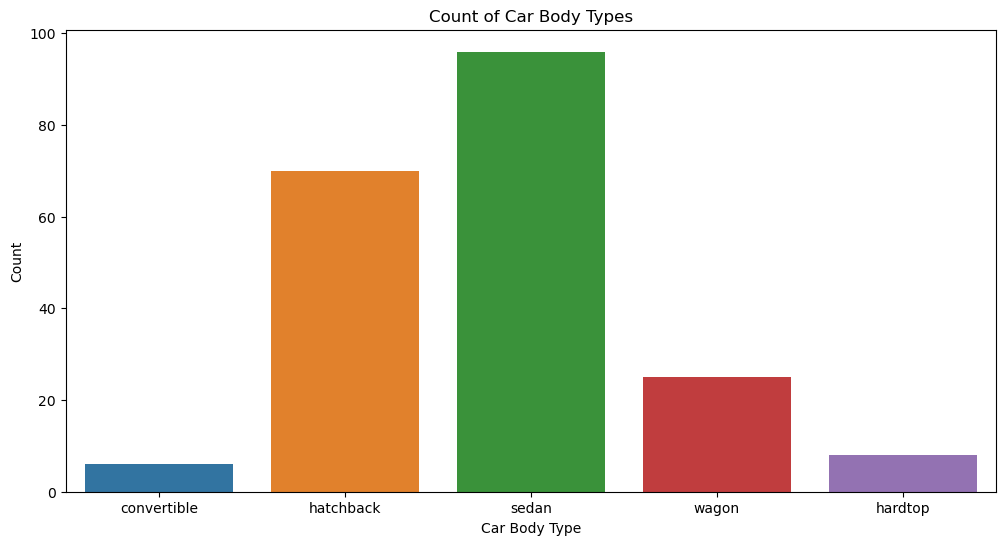

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='carbody')
plt.title('Count of Car Body Types')
plt.xlabel('Car Body Type')
plt.ylabel('Count')
plt.show()

In [26]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Car_Company', 'Car_model'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [28]:
df_num = df.select_dtypes(include = np.number)
df_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


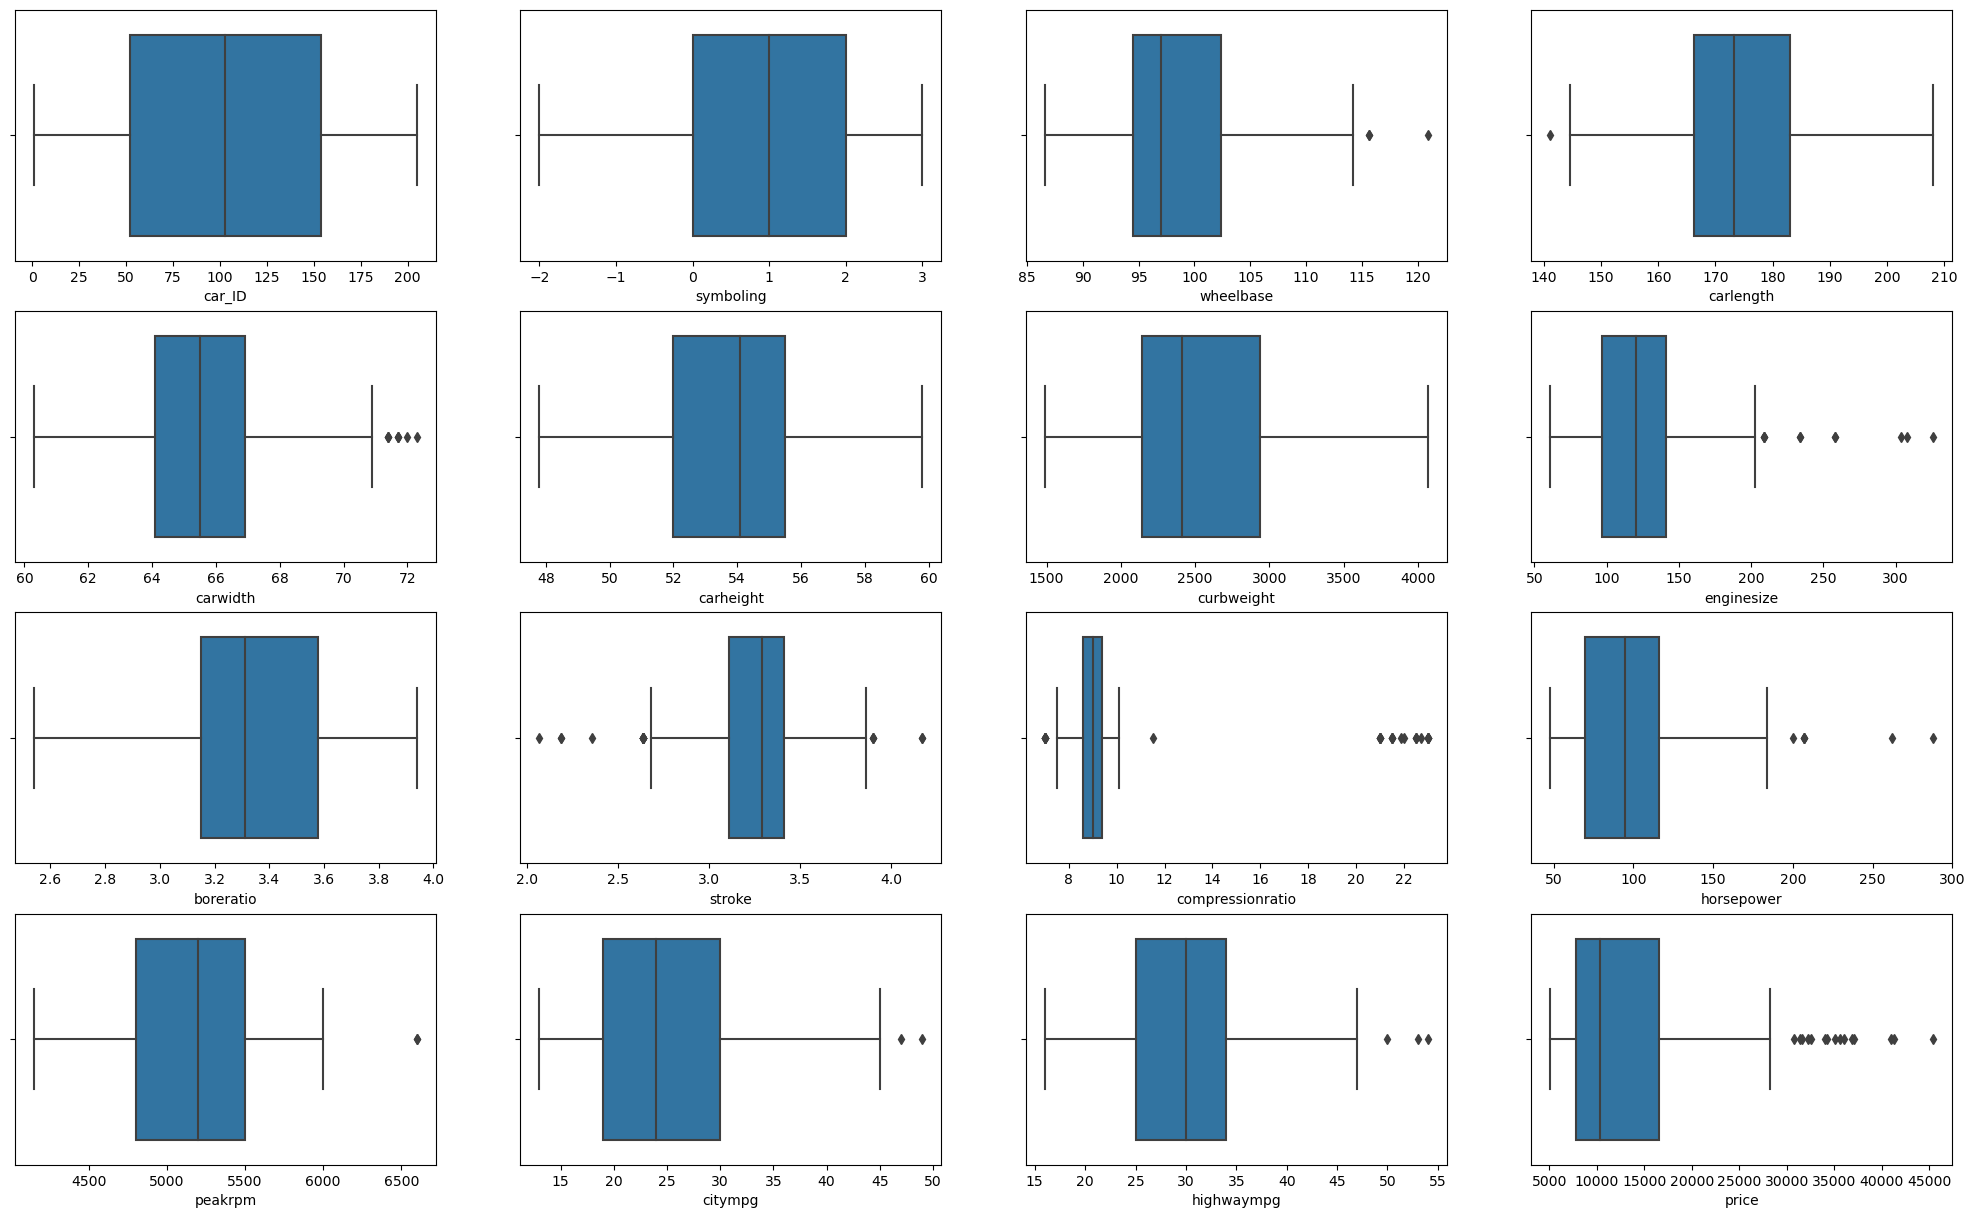

In [29]:
fig,ax = plt.subplots(4,4 ,figsize = (25,15))
for i,subplot in zip(df_num,ax.flatten()):
    sns.boxplot(df_num[i],ax = subplot)

In [30]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Define the columns you want to label encode
categorical_columns = df.select_dtypes(include='object')

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [31]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_Company,Car_model
0,1,3,2,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,78
1,2,3,3,1,0,1,0,2,0,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,122
2,3,1,1,1,0,1,2,2,0,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,28
3,4,2,4,1,0,0,3,1,0,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,2,0
4,5,2,5,1,0,0,3,0,0,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,26,5
201,202,-1,138,1,1,0,3,2,0,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,26,4
202,203,-1,140,1,0,0,3,2,0,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,26,6
203,204,-1,142,0,1,0,3,2,0,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,26,8


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [33]:
df.drop('car_ID',axis =  1,inplace = True)

In [34]:
df.drop('CarName',axis =  1,inplace = True)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = df.drop(['price'],axis = 1)
y = df['price']

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=20)

In [38]:
# Create a dictionary of regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor()
}

# Lists to store evaluation metrics
mse_scores = []
mae_scores = []
r2_scores = []

# Train and evaluate regression models
for model_name, model in regression_models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    # Calculate evaluation metrics
    mse = mean_squared_error(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    r2 = r2_score(ytest, y_pred)

    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Create a DataFrame to store the results
regression_scores_df = pd.DataFrame({
    "Algorithm": regression_models.keys(),
    "Mean Squared Error (MSE)": mse_scores,
    "Mean Absolute Error (MAE)": mae_scores,
    "R-squared (R2)": r2_scores
})

# Print the regression scores DataFrame
regression_scores_df

,Algorithm,Mean Squared Error (MSE),Mean Absolute Error (MAE),R-squared (R2)
0,Linear Regression,7.035347e+06,2093.505942,0.798134
1,Ridge Regression,6.852009e+06,2049.236625,0.803394
2,Lasso Regression,6.898089e+06,2067.195418,0.802072
3,Decision Tree Regressor,1.068250e+07,2086.838710,0.693485
4,Random Forest Regressor,4.117920e+06,1439.644651,0.881844
5,Gradient Boosting Regressor,3.653980e+06,1252.362448,0.895156


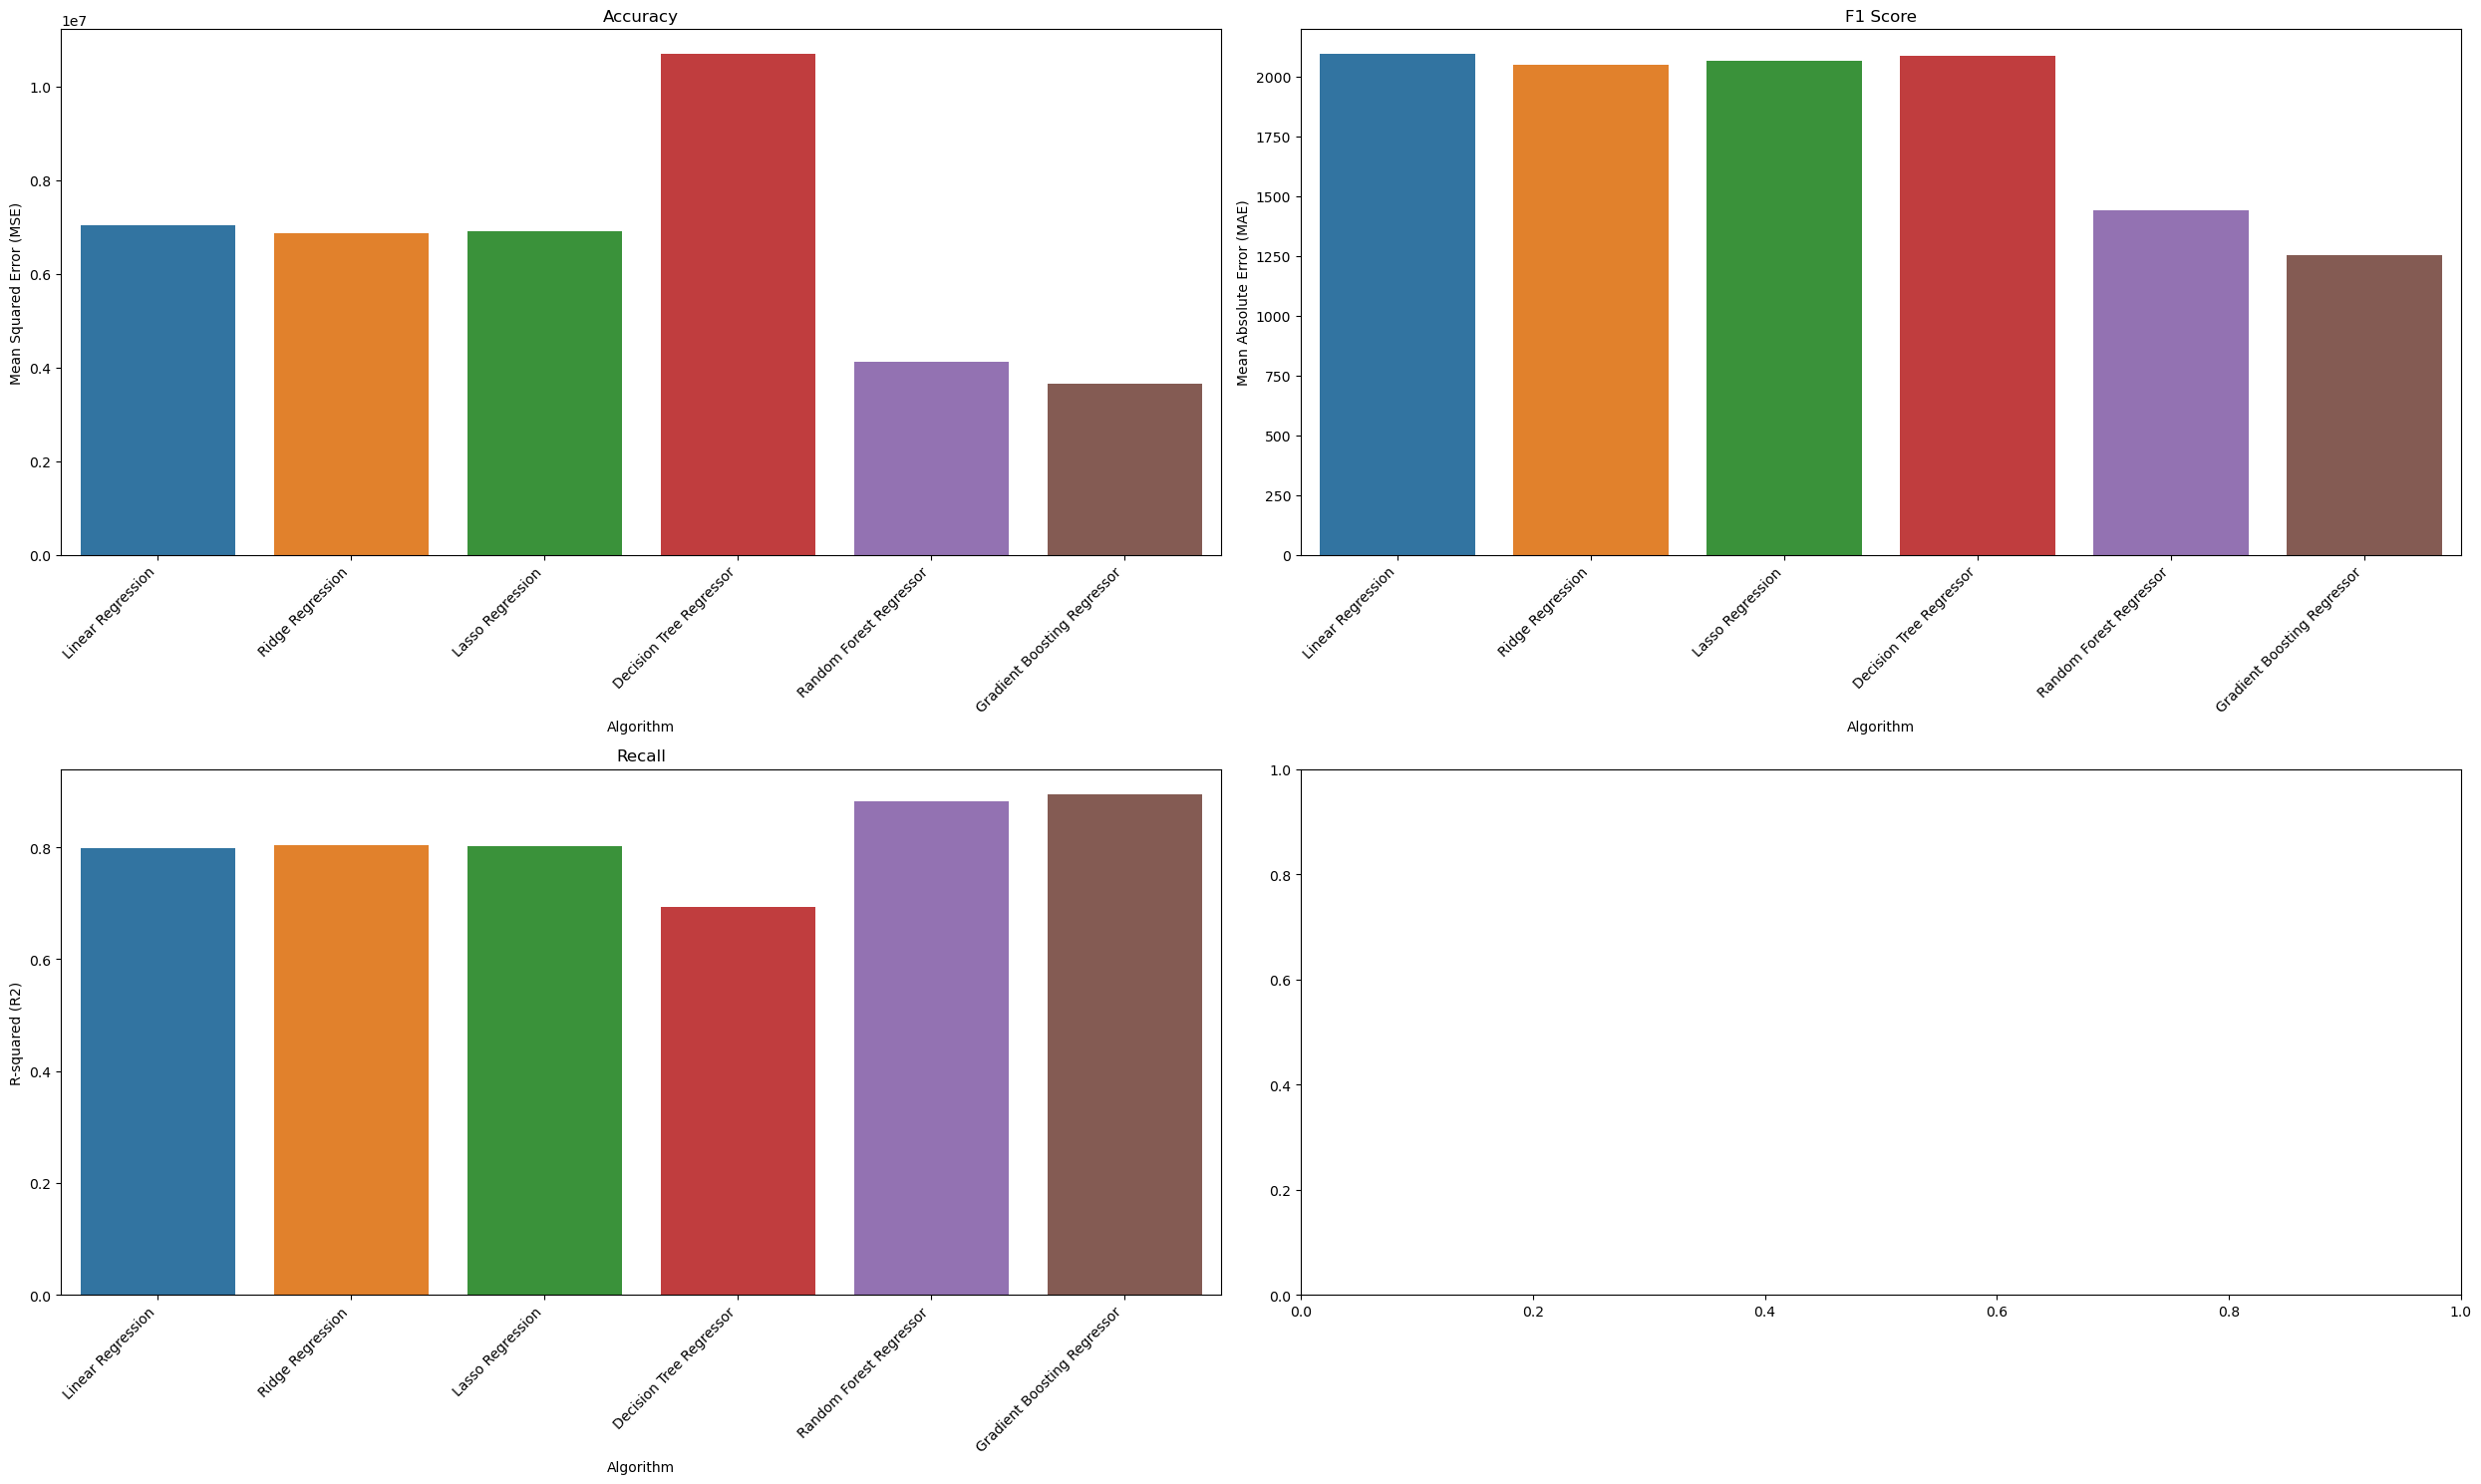

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 subplot layout
fig, ax = plt.subplots(2,2,figsize=(25, 15))

# Plot Accuracy
sns.barplot(x='Algorithm', y='Mean Squared Error (MSE)', data=regression_scores_df, ax=ax[0, 0])
ax[0, 0].set_title('Accuracy')

# Plot F1 Score
sns.barplot(x='Algorithm', y='Mean Absolute Error (MAE)', data=regression_scores_df, ax=ax[0, 1])
ax[0, 1].set_title('F1 Score')

# Plot Recall
sns.barplot(x='Algorithm', y='R-squared (R2)', data=regression_scores_df, ax=ax[1, 0])
ax[1, 0].set_title('Recall')

# Rotate the x-axis labels to avoid overlapping
plt.setp(ax[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(ax[0, 1].get_xticklabels(), rotation=45, ha='right')
plt.setp(ax[1, 0].get_xticklabels(), rotation=45, ha='right')

# Add some spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()